In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve,RocCurveDisplay
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import pickle

In [5]:
df=pd.read_csv('C:/Users/Admin/OneDrive/Desktop/EDUCATION/DATA SET_DATATRAINED/Glass Identification.csv')

In [6]:
df.head()

,idno,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:

def describe_data(data):
    print('Data type:',data.dtypes)
    print('-------------------------')
    print('column name:',data.columns)
    print('--------------------------')
    print('data shape:',data.shape)

describe_data(df)    

Data type: idno                  int64
refractive index    float64
Sodium              float64
Magnesium           float64
Aluminum            float64
Silicon             float64
Potassium           float64
Calcium             float64
Barium              float64
Iron                float64
Type_of_glass         int64
dtype: object
-------------------------
column name: Index(['idno', 'refractive index', 'Sodium', 'Magnesium', 'Aluminum',
       'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'Type_of_glass'],
      dtype='object')
--------------------------
data shape: (214, 11)


In [8]:
for i in df.columns:
    un=df[i].unique()
    print(i,un.size)

idno 214
refractive index 178
Sodium 142
Magnesium 94
Aluminum 118
Silicon 133
Potassium 65
Calcium 143
Barium 34
Iron 32
Type_of_glass 6


In [9]:
df.isnull().sum()

idno                0
refractive index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type_of_glass       0
dtype: int64

<AxesSubplot:>

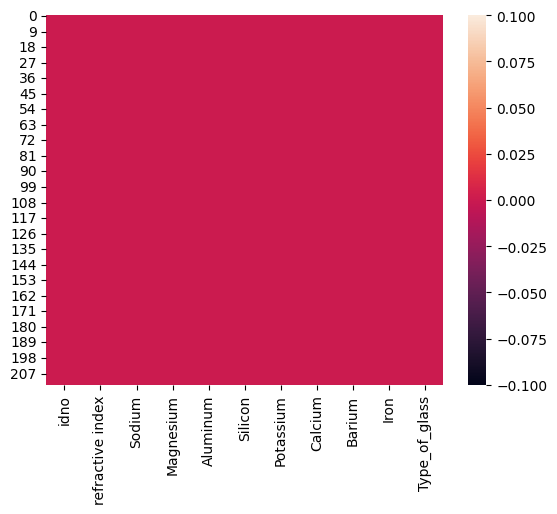

In [10]:
sns.heatmap(data=df.isnull())

In [11]:
for i in df.columns:
    if df[i].is_unique==True:
        print(i,'is unique in nature')
    else: print (i,'--is contain non_nique value')    

idno is unique in nature
refractive index --is contain non_nique value
Sodium --is contain non_nique value
Magnesium --is contain non_nique value
Aluminum --is contain non_nique value
Silicon --is contain non_nique value
Potassium --is contain non_nique value
Calcium --is contain non_nique value
Barium --is contain non_nique value
Iron --is contain non_nique value
Type_of_glass --is contain non_nique value


In [12]:
glass_data=df.drop(columns=['idno'],axis=1)

In [13]:
glass_data.loc[glass_data['Type_of_glass']<=4,'Type_of_glass']=0
glass_data.loc[glass_data['Type_of_glass']>4,'Type_of_glass']=1

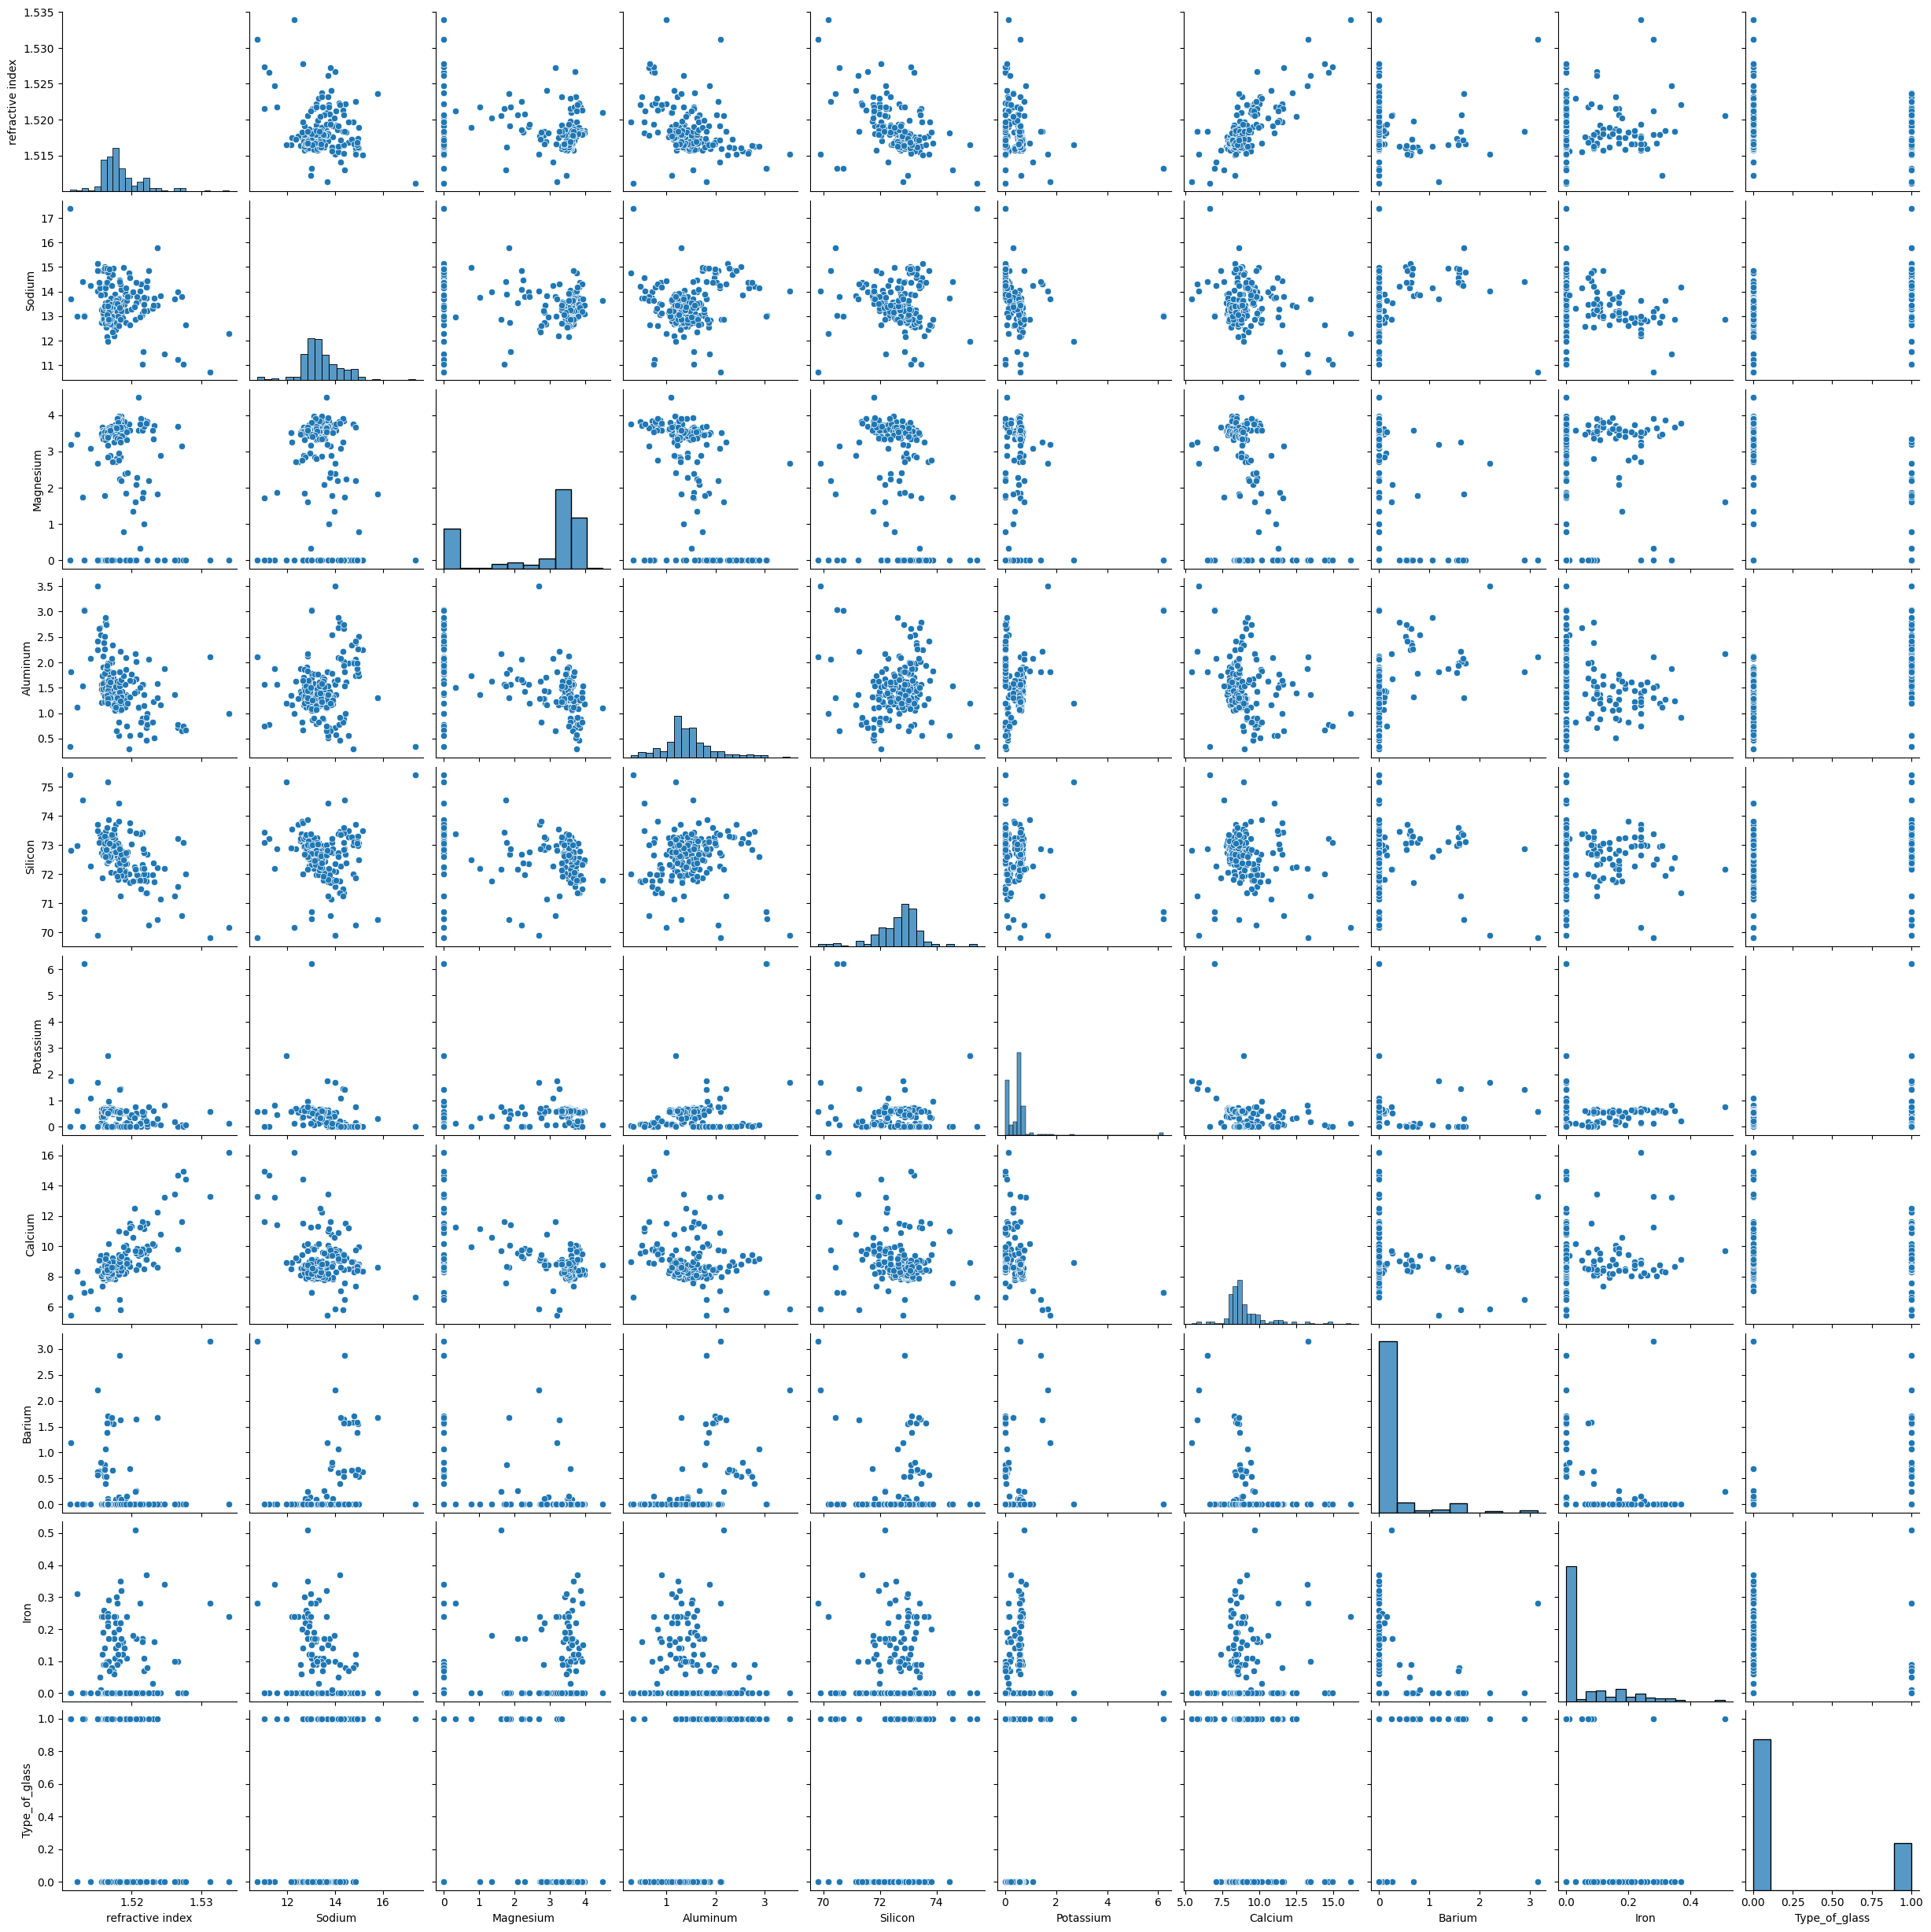

In [14]:
sns.pairplot(data=glass_data)

<Figure size 1500x2000 with 0 Axes>

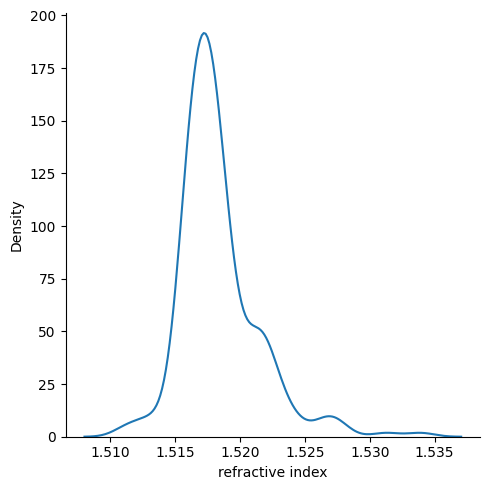

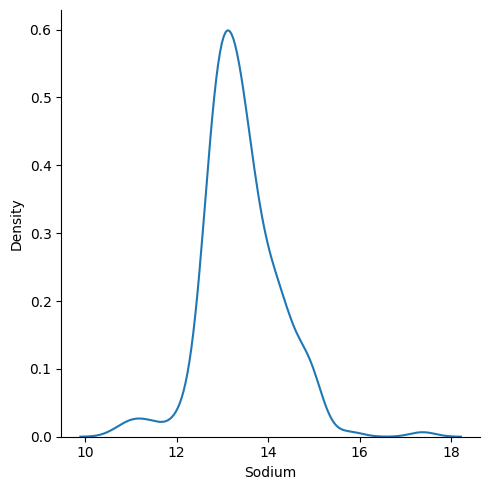

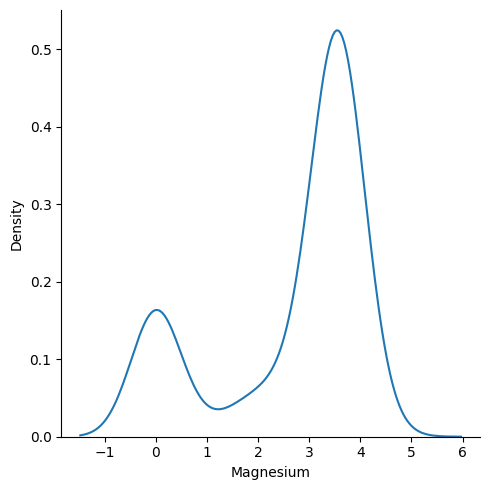

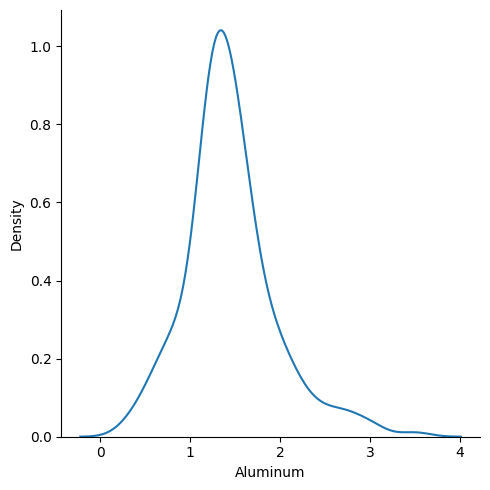

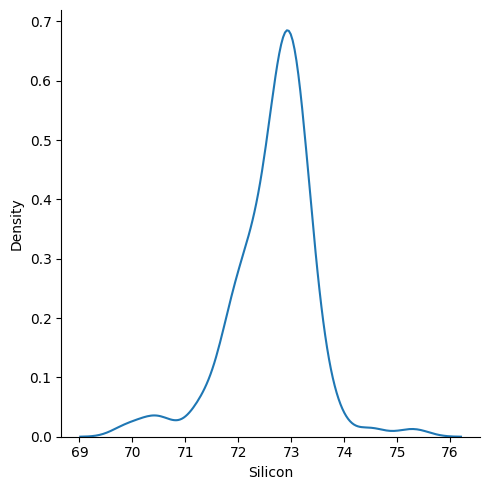

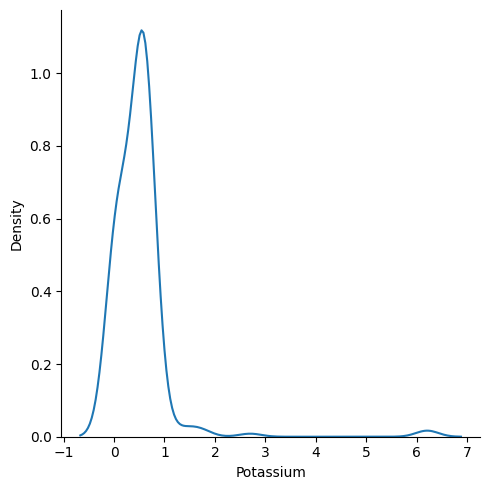

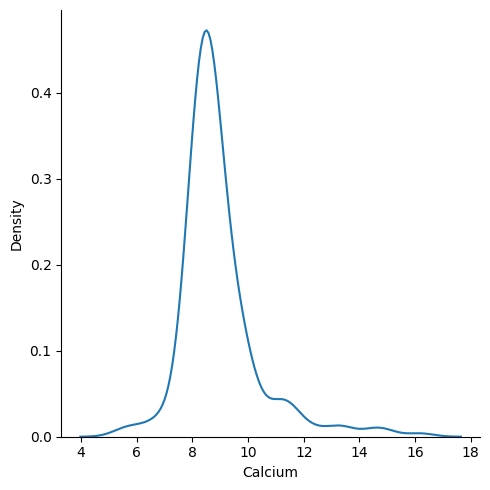

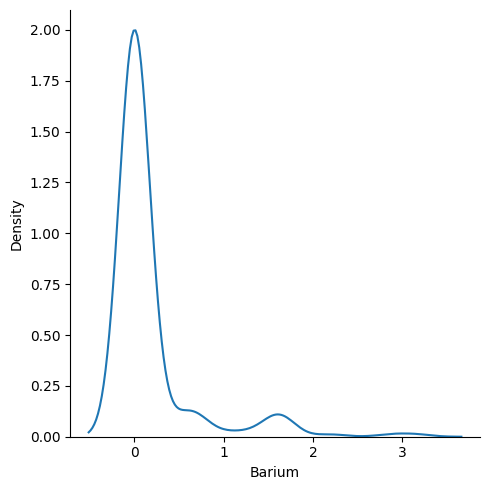

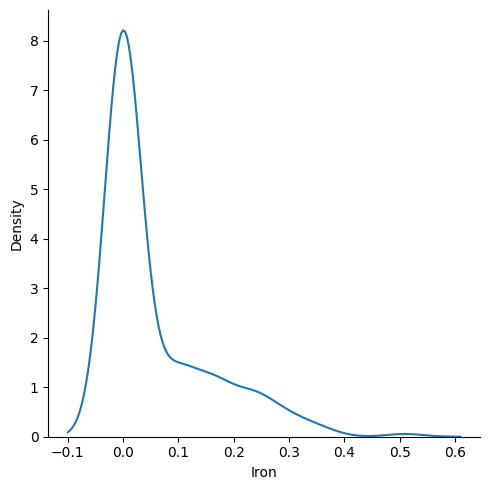

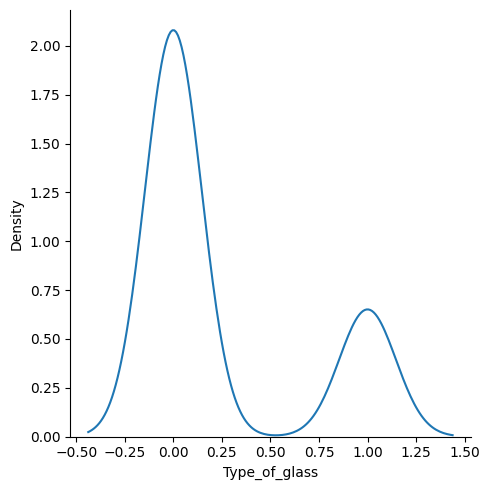

In [15]:
plt.figure(figsize=(15,20),facecolor='blue')
for column in glass_data.columns:
    sns.displot(data=glass_data,x=column,kind='kde',palette='bright')
    plt.tight_layout()


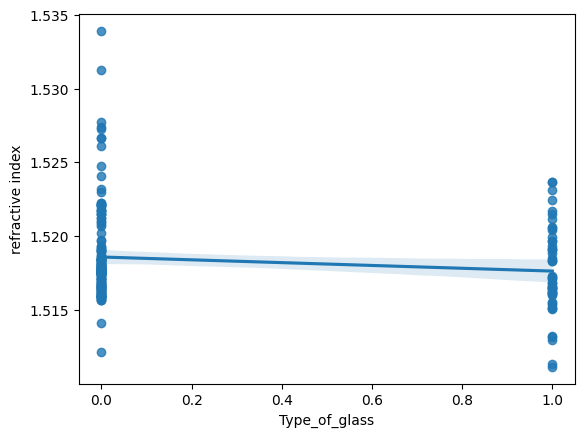

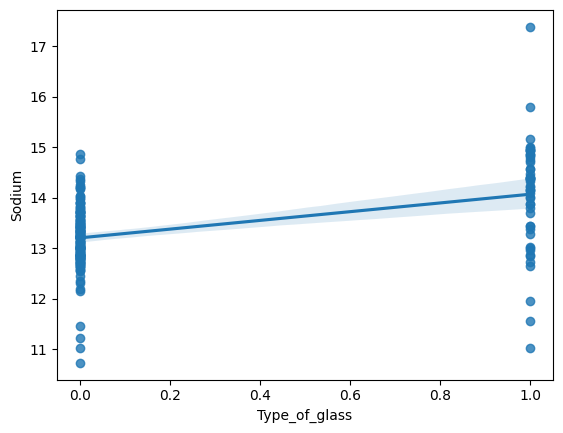

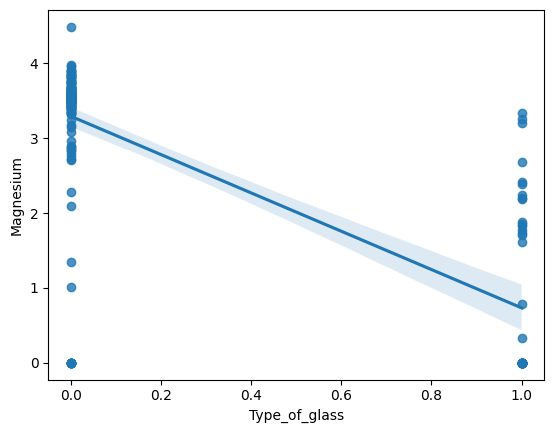

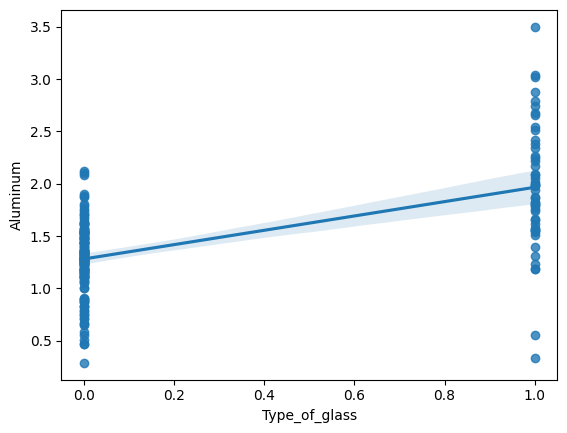

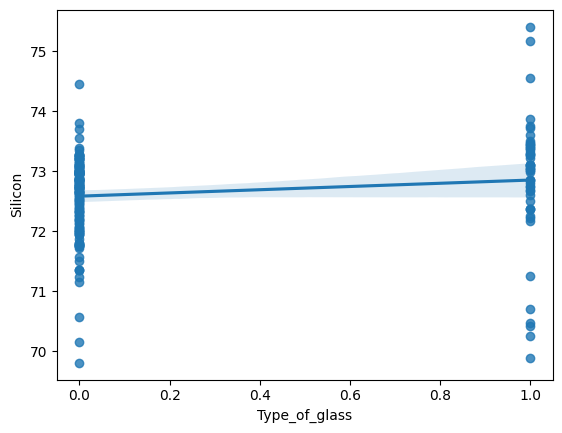

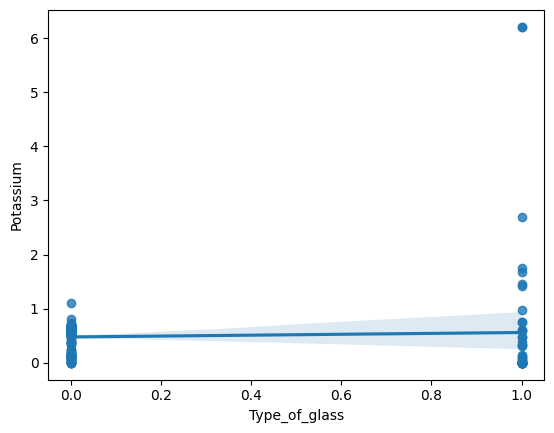

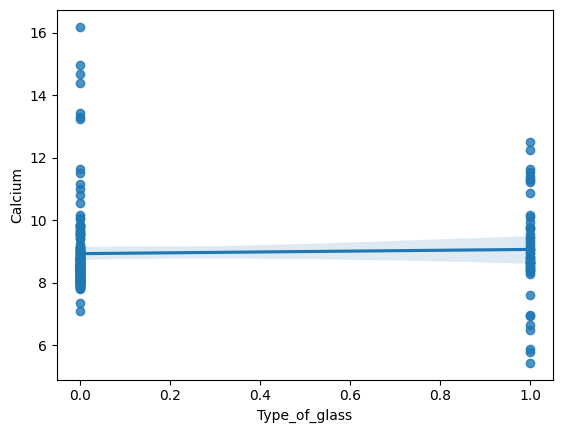

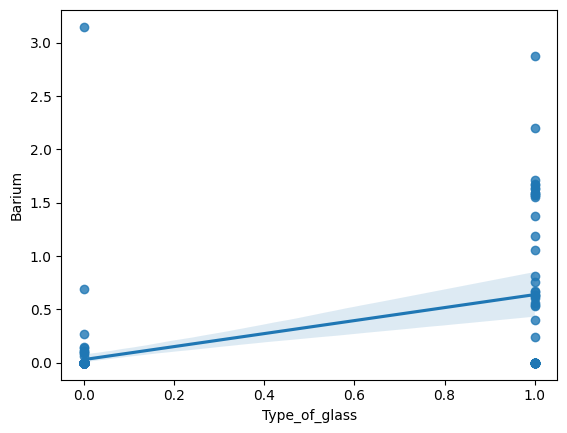

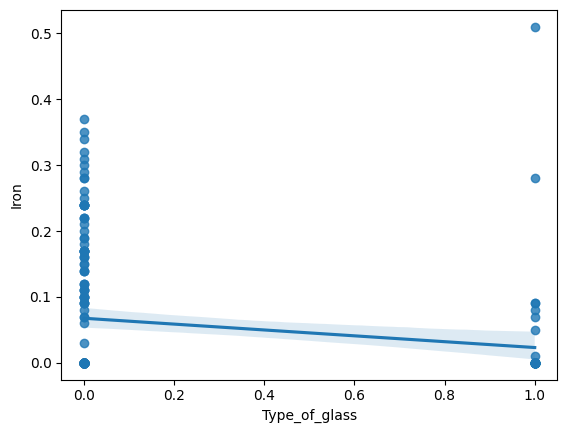

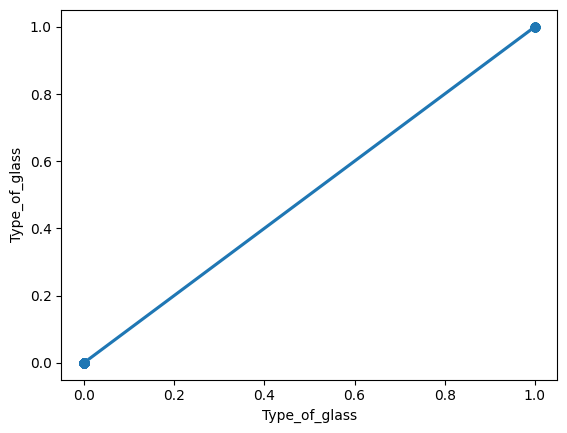

In [16]:
plotnumber=1
columns = glass_data.columns
for i in range(len(columns)):
        if plotnumber<=12:
                sns.regplot(x='Type_of_glass', y=columns[i], data=glass_data)
                plotnumber=+1
        plt.show()

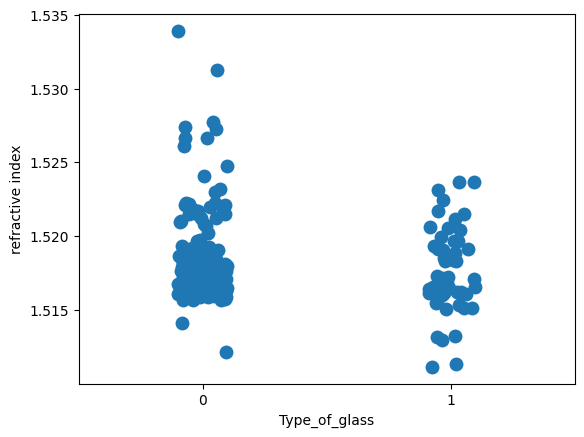

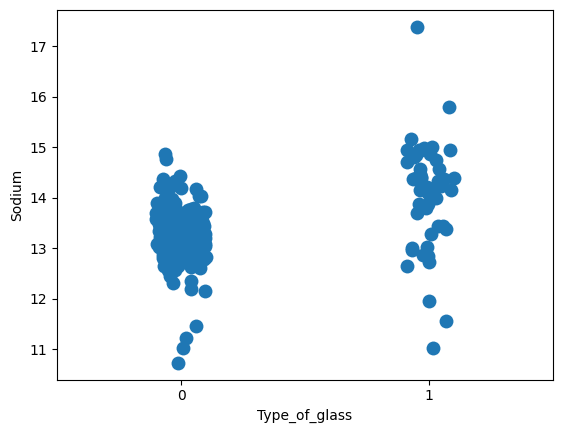

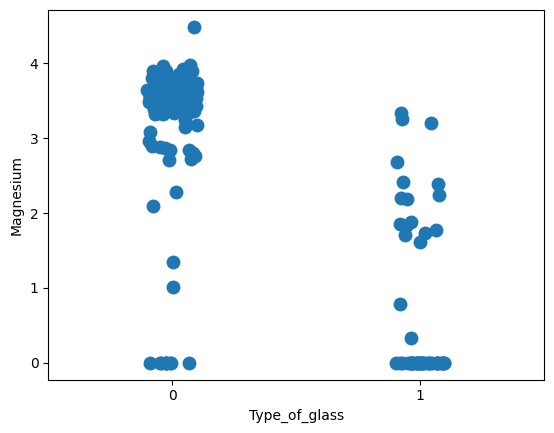

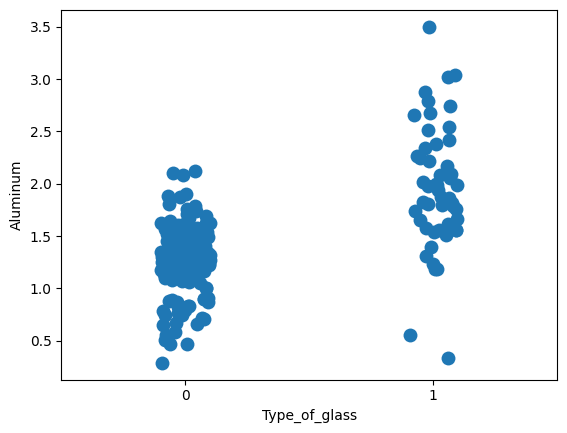

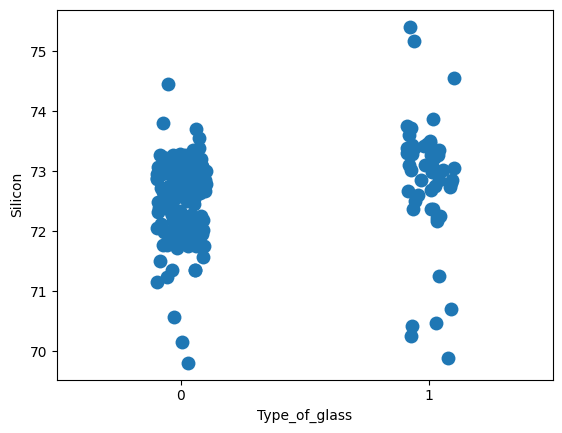

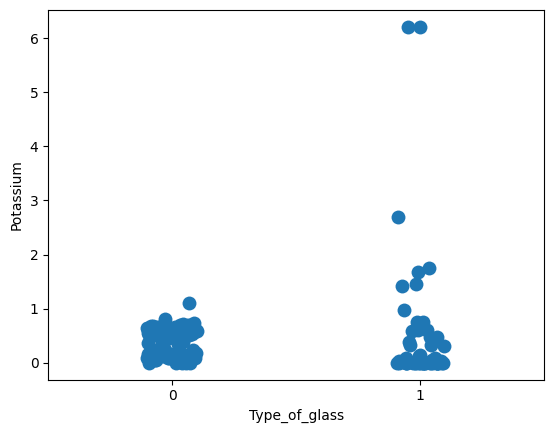

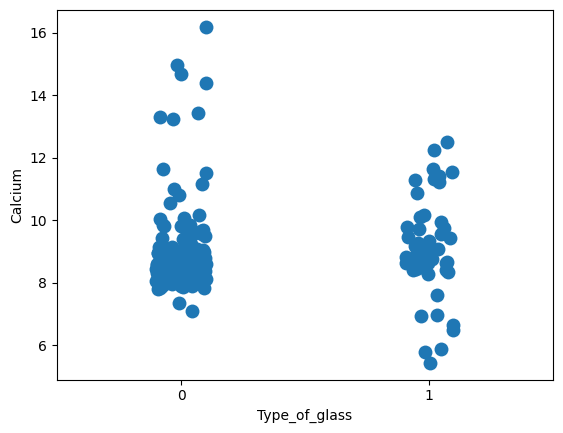

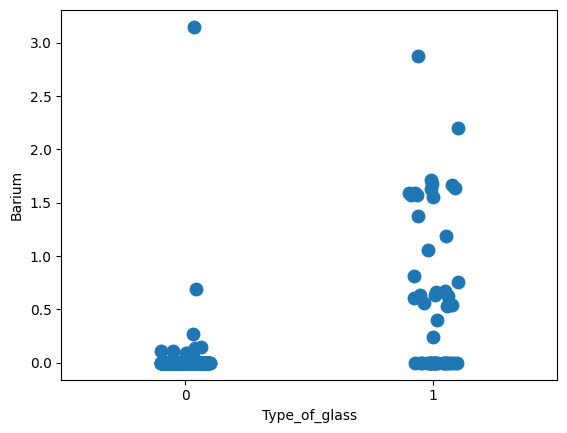

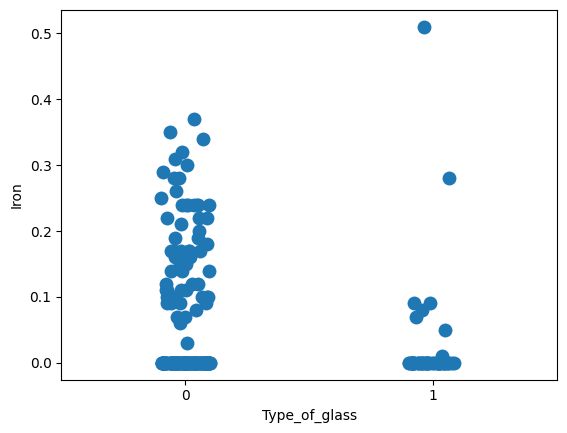

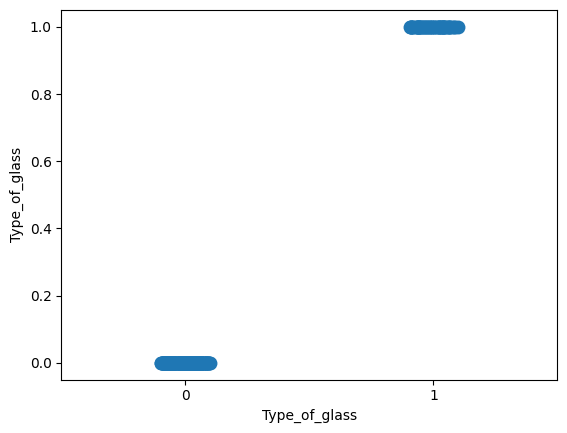

In [17]:
for column in glass_data:
    sns.stripplot(data=glass_data,x='Type_of_glass',y=column,size=10)
    plt.show()

In [18]:
glass_data.describe()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,0.238318
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.427053
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,0.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


<AxesSubplot:>

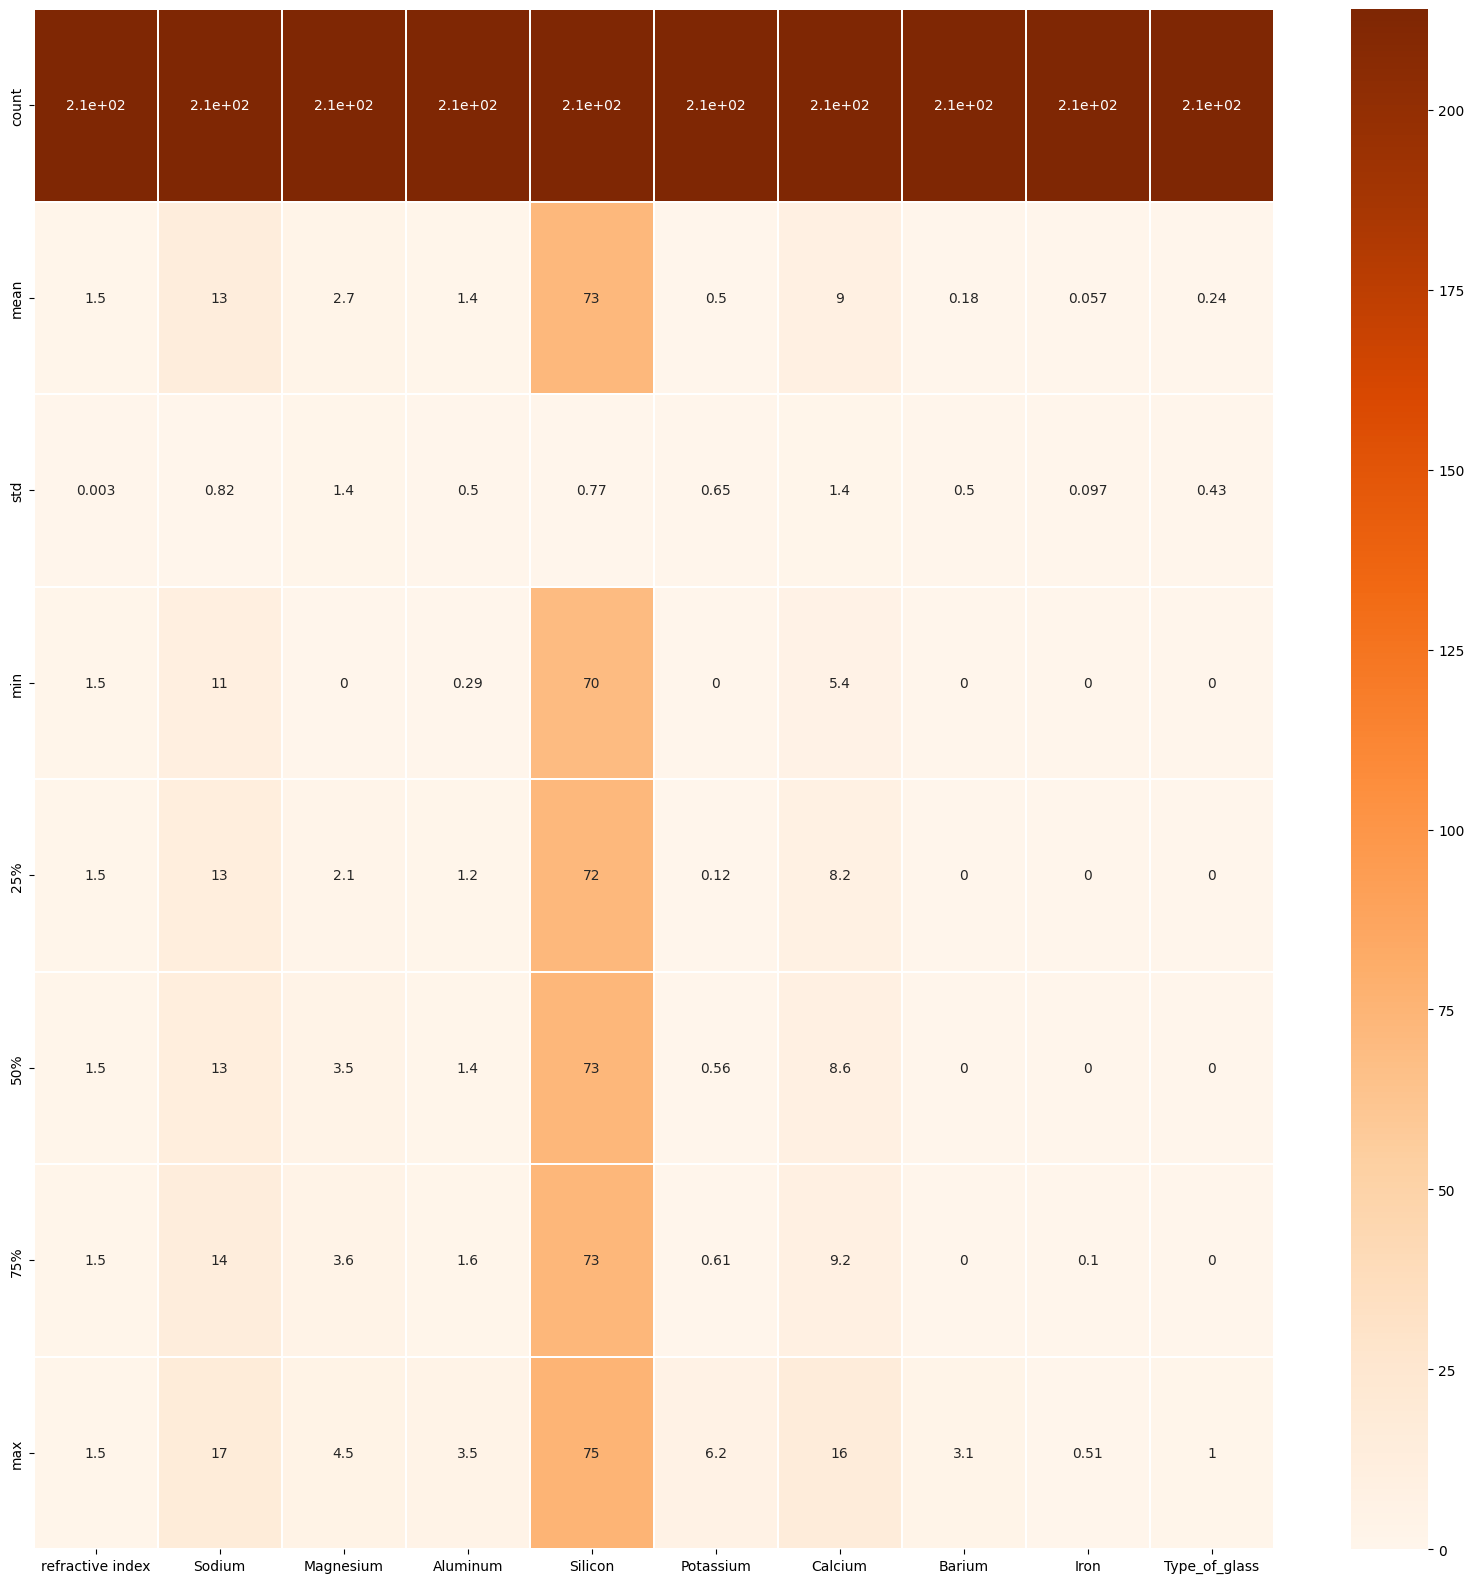

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(glass_data.describe(),fmt='0.2g',linewidths=0.1,linecolor='white',annot=True,cmap='Oranges')

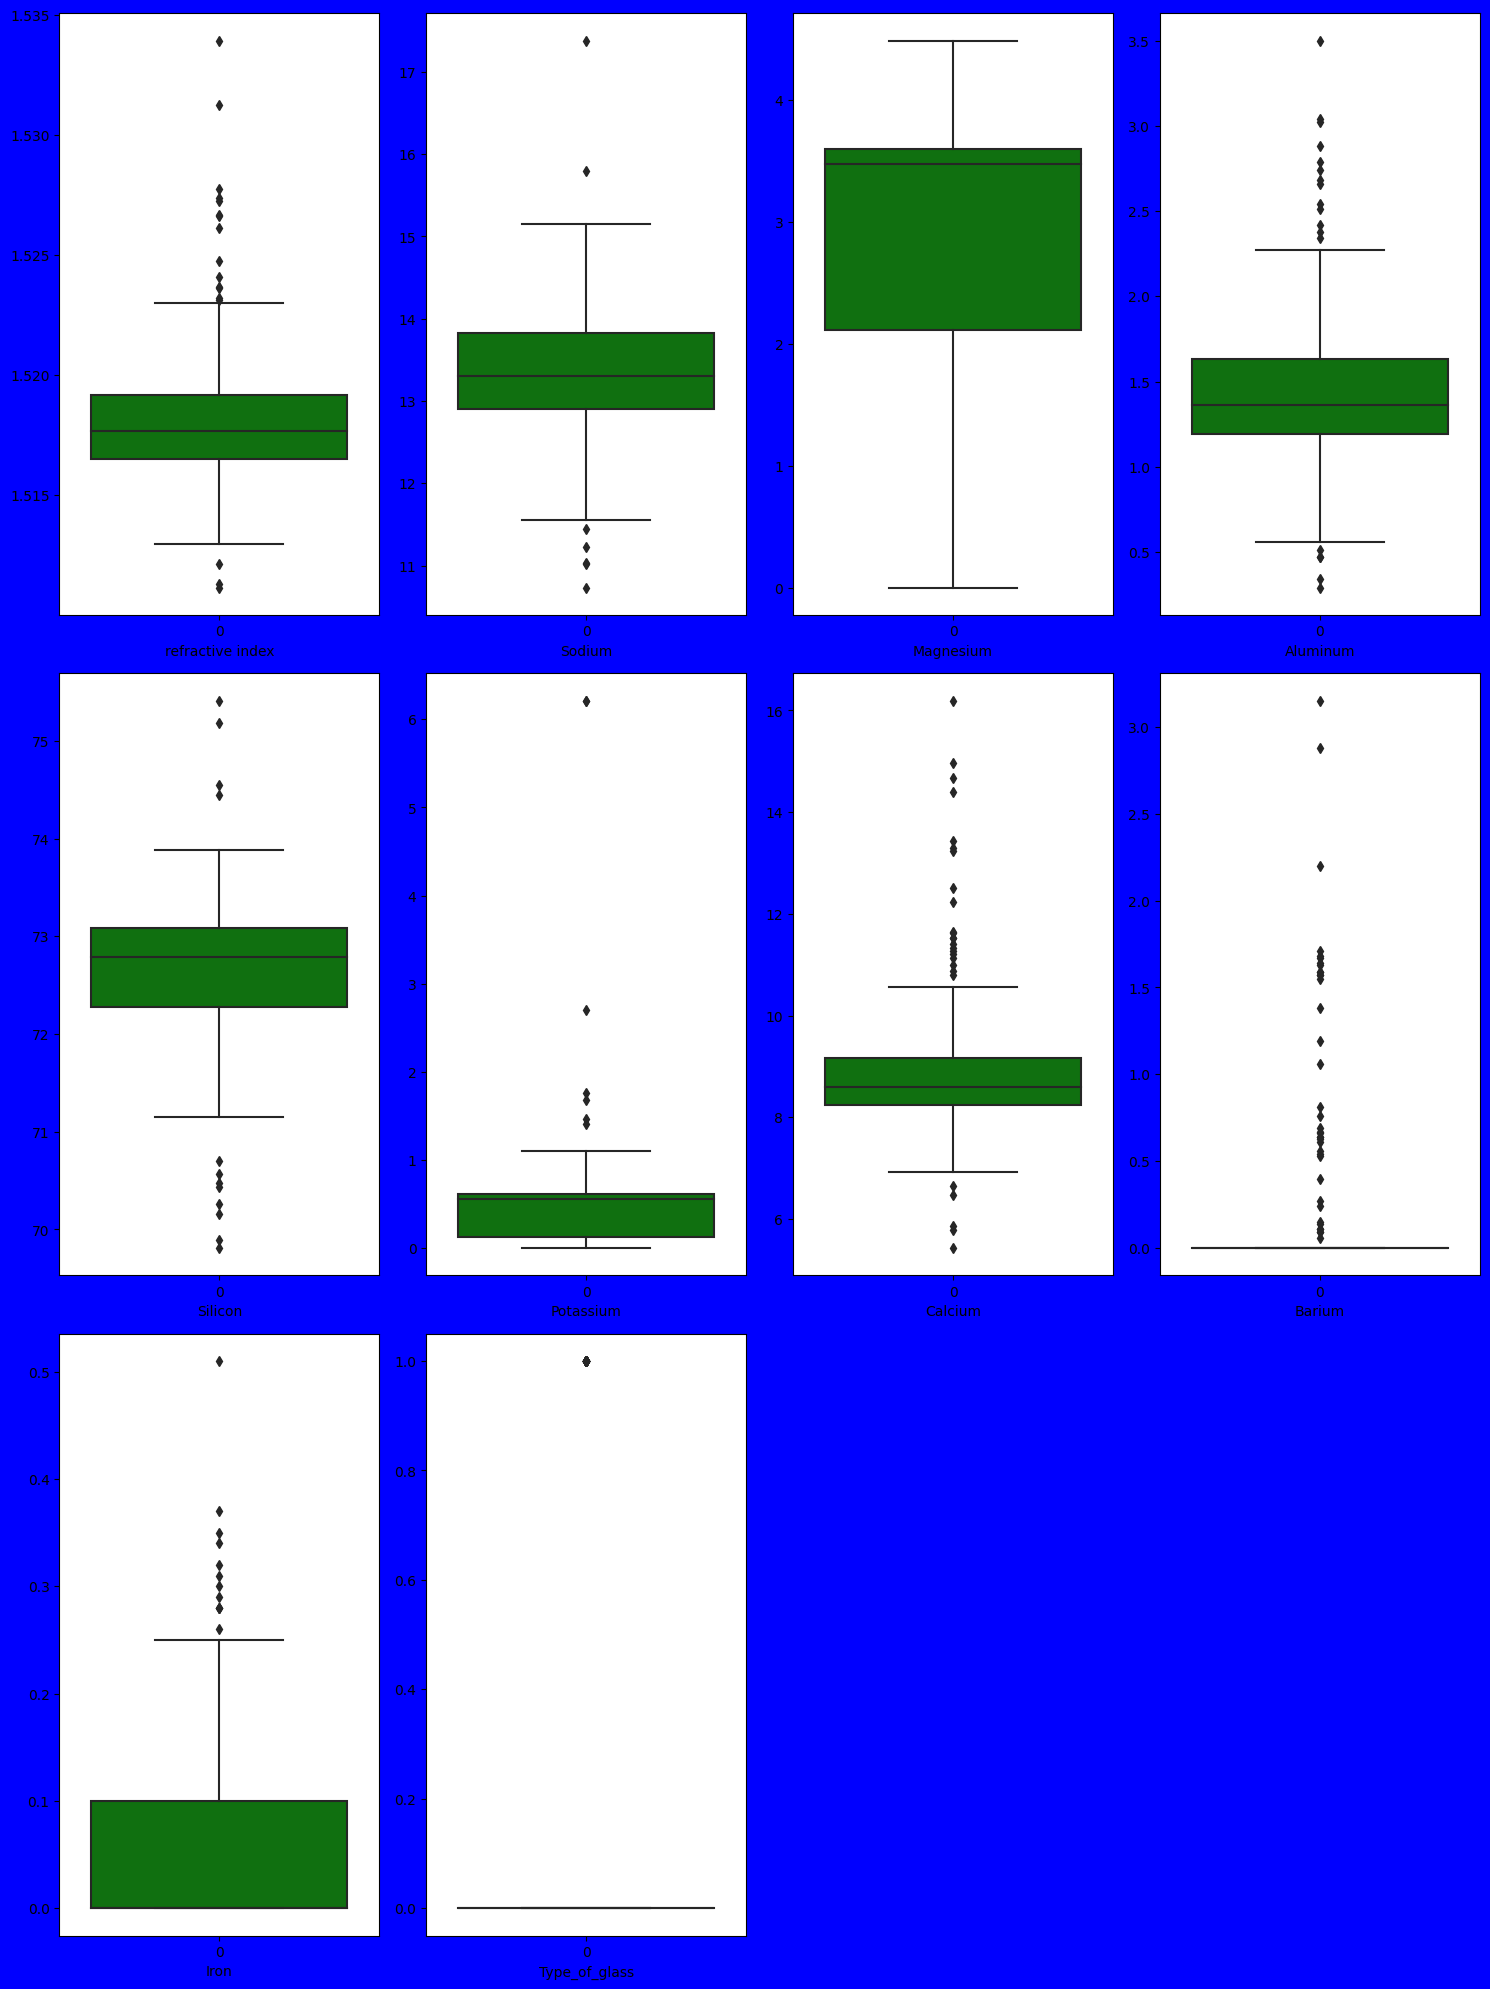

In [20]:
plt.figure(figsize=(15,20),facecolor='blue')
plotnumber=1
for column in glass_data:
    plt.subplot(3,4,plotnumber)
    sns.boxplot(glass_data[column],color='green')
    plt.xlabel(column)
    plotnumber+=1
plt.tight_layout() 

In [21]:
glass_data.skew()

refractive index    1.625431
Sodium              0.454181
Magnesium          -1.152559
Aluminum            0.907290
Silicon            -0.730447
Potassium           6.551648
Calcium             2.047054
Barium              3.416425
Iron                1.754327
Type_of_glass       1.237086
dtype: float64

In [22]:
glass_data['Potassium']=np.cbrt(glass_data['Potassium'])

In [23]:
glass_data.skew()

refractive index    1.625431
Sodium              0.454181
Magnesium          -1.152559
Aluminum            0.907290
Silicon            -0.730447
Potassium          -0.591896
Calcium             2.047054
Barium              3.416425
Iron                1.754327
Type_of_glass       1.237086
dtype: float64

In [24]:
for i in glass_data.columns:
    print(i)

refractive index
Sodium
Magnesium
Aluminum
Silicon
Potassium
Calcium
Barium
Iron
Type_of_glass


In [25]:
columns=glass_data.columns
out_lier=glass_data[columns]
z=np.abs(zscore(out_lier))
## Removing outlier
glass_data_z=glass_data[(z<3).all(axis=1)]
print('## dataloss:')
print((glass_data.shape[0]-glass_data_z.shape[0])/(glass_data.shape[0])*100)

## dataloss:
9.345794392523365


In [26]:
def remove_outlier(value,data):
    q3=data[value].quantile(0.75)
    q1=data[value].quantile(0.25)
    iqr=(q3-q1)
    value_high=(q3+1.5*iqr)
    value_low=(q1-1.5*iqr)
    h_index=np.where(data[value]>value_high)
    l_index=np.where(data[value]<value_low)
    data2=data.drop(data.index[l_index])
    data2.reset_index()
    data3=data2.drop(data.index[h_index])
    data3.reset_index()
    print(pd.DataFrame(data3))
    print('data_loss:',(data.shape[0]-data3.shape[0])/(data.shape[0])*100)
    
remove_outlier('Aluminum',data=glass_data)

     refractive index  Sodium  Magnesium  Aluminum  Silicon  Potassium  \
0             1.52101   13.64       4.49      1.10    71.78   0.391487   
1             1.51761   13.89       3.60      1.36    72.73   0.782974   
2             1.51618   13.53       3.55      1.54    72.99   0.730614   
3             1.51766   13.21       3.69      1.29    72.61   0.829134   
4             1.51742   13.27       3.62      1.24    73.08   0.819321   
..                ...     ...        ...       ...      ...        ...   
207           1.51831   14.39       0.00      1.82    72.86   1.121346   
210           1.51685   14.92       0.00      1.99    73.06   0.000000   
211           1.52065   14.36       0.00      2.02    73.42   0.000000   
212           1.51651   14.38       0.00      1.94    73.61   0.000000   
213           1.51711   14.23       0.00      2.08    73.36   0.000000   

     Calcium  Barium  Iron  Type_of_glass  
0       8.75    0.00   0.0              0  
1       7.83    0.00   

Type_of_glass       1.000000
Barium              0.618309
Aluminum            0.600752
Sodium              0.463723
Calcium             0.288044
Silicon             0.282746
refractive index   -0.060410
Iron               -0.207574
Potassium          -0.601999
Magnesium          -0.840407
Name: Type_of_glass, dtype: float64


<AxesSubplot:>

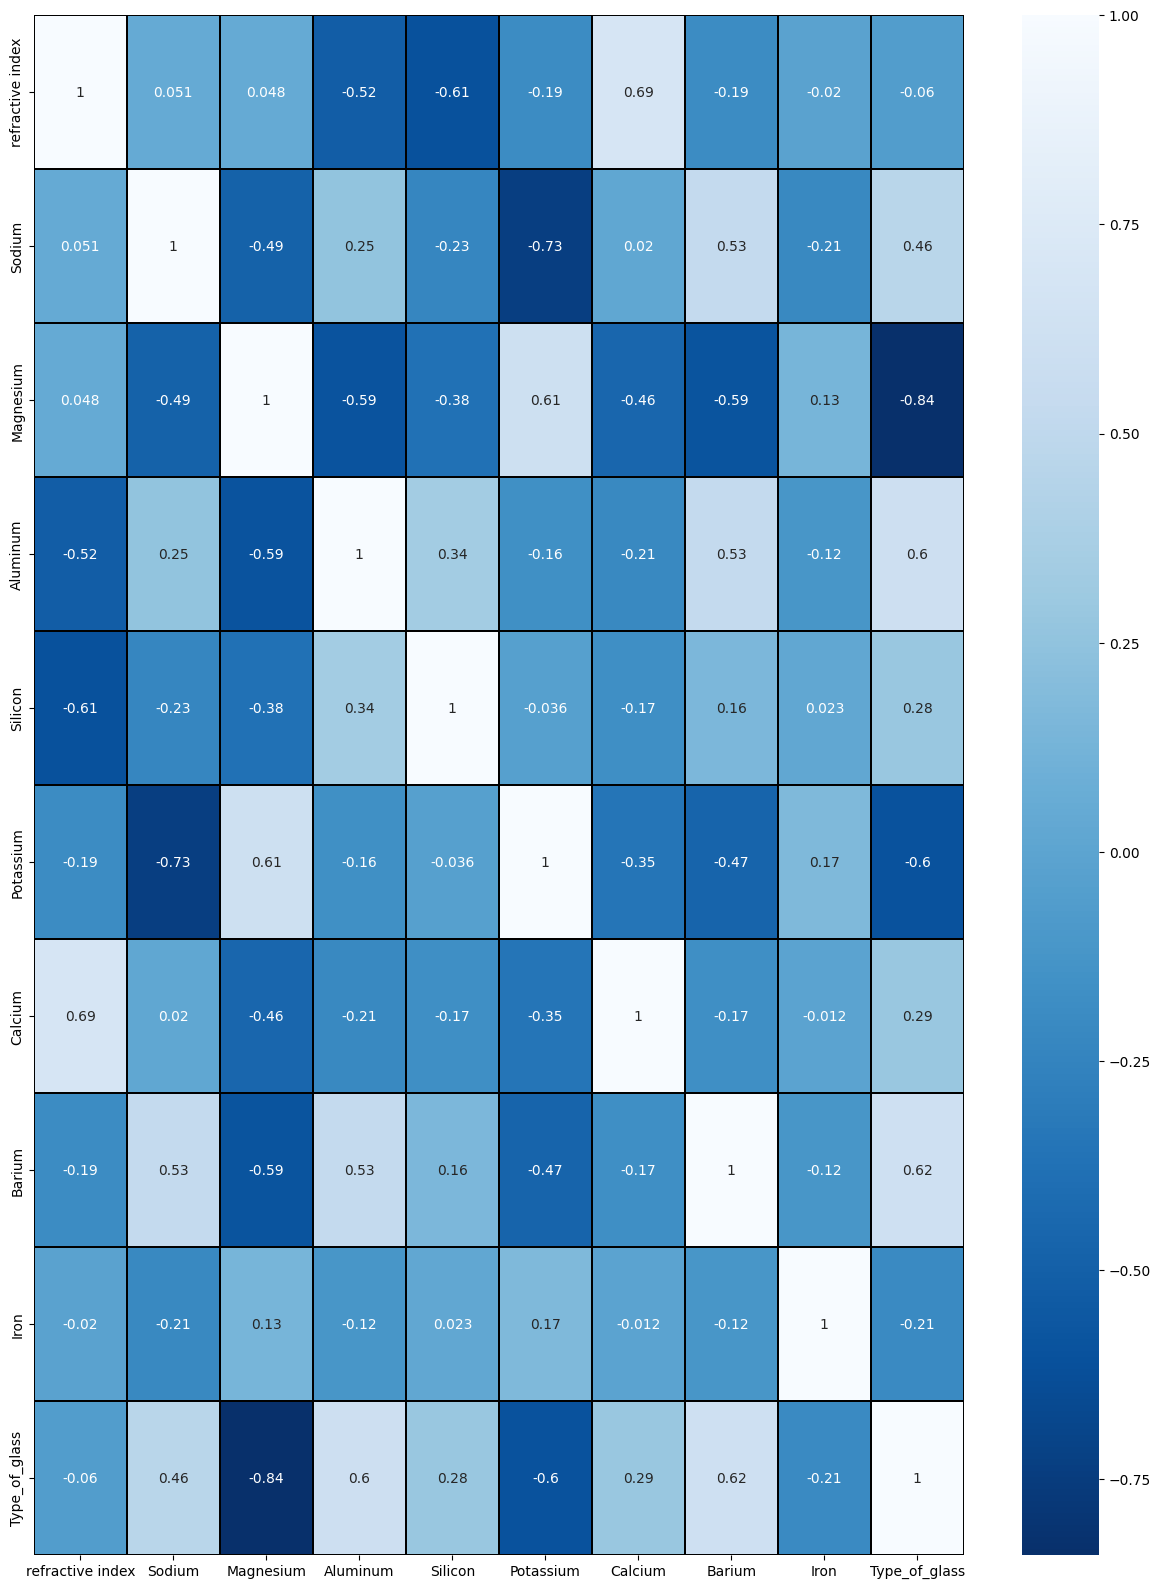

In [27]:
cor=glass_data_z.corr()
## relation with label and feature
print(cor['Type_of_glass'].sort_values(ascending=False))
## Plotting a heat map
plt.figure(figsize=(15,20))
sns.heatmap(glass_data_z.corr(),cmap='Blues_r',fmt='0.2g',linecolor='black',annot=True,linewidths=0.1)

In [28]:
x=glass_data_z.drop(columns=['Type_of_glass'])
y=glass_data_z['Type_of_glass']
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

In [29]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i)for i in range(x.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,5.609921,refractive index
1,23.333709,Sodium
2,84.416692,Magnesium
3,11.480151,Aluminum
4,18.316614,Silicon
5,7.165559,Potassium
6,50.131217,Calcium
7,9.574109,Barium
8,1.062315,Iron


In [30]:
x=x.drop(columns=['Magnesium'])

In [31]:
print('sample distribution before SMOTE:',y.value_counts())
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)
print('**************************************************')
print('sample distribution after SMOTE:',y1.value_counts())

sample distribution before SMOTE: 0    154
1     40
Name: Type_of_glass, dtype: int64
**************************************************
sample distribution after SMOTE: 0    154
1    154
Name: Type_of_glass, dtype: int64


In [32]:
max_accuracy=0
max_rs=0
for i in range (1000):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=i)
    regression_lr=LogisticRegression()
    regression_lr.fit(x_train,y_train)
    pred=regression_lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > max_accuracy:
        max_accuracy=acc
        max_rs=i

print('Maximum accuracy:',max_accuracy, 'on random state:',max_rs)

Maximum accuracy: 1.0 on random state: 8


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=max_rs)

In [34]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
score_LR=cross_val_score(LR,x_scaled,y)
print('Accuracy Score=',accuracy_score(y_test,pred_LR))
print('confusion metrics=',confusion_matrix(y_test,pred_LR))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_LR))
print('cross_val_score=',score_LR)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_LR.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_LR)-score_LR.mean())

Accuracy Score= 1.0
confusion metrics= [[42  0]
 [ 0 35]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        35

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77

cross_val_score= [0.79487179 0.82051282 0.8974359  0.94871795 0.97368421]
--------------------------------------------------------------------------------------
avg value: 0.8870445344129555
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.1129554655870445


In [35]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
score_ETC=cross_val_score(ETC,x_scaled,y)
print('Accuracy Score=',accuracy_score(y_test,pred_ETC))
print('confusion metrics=',confusion_matrix(y_test,pred_ETC))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_ETC))
print('cross_val_score=',score_ETC)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_ETC.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_ETC)-score_ETC.mean())

Accuracy Score= 1.0
confusion metrics= [[42  0]
 [ 0 35]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        35

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77

cross_val_score= [0.79487179 0.84615385 0.8974359  0.8974359  0.97368421]
--------------------------------------------------------------------------------------
avg value: 0.8819163292847503
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.11808367071524972


In [36]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_test)
score_DT=cross_val_score(DT,x1,y1)
print('Accuracy Score=',accuracy_score(y_test,pred_DT))
print('confusion metrics=',confusion_matrix(y_test,pred_DT))
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,pred_DT))
print('cross_val_score=',score_DT)
print('--------------------------------------------------------------------------------------')
print('avg value:',score_DT.mean())
print('--------------------------------------------------------------------------------------')
print('difference between accuracy and cv_score is::',accuracy_score(y_test,pred_DT)-score_DT.mean())

Accuracy Score= 0.987012987012987
confusion metrics= [[41  1]
 [ 0 35]]
classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.97      1.00      0.99        35

    accuracy                           0.99        77
   macro avg       0.99      0.99      0.99        77
weighted avg       0.99      0.99      0.99        77

cross_val_score= [0.90322581 1.         0.83870968 0.8852459  0.95081967]
--------------------------------------------------------------------------------------
avg value: 0.915600211528292
--------------------------------------------------------------------------------------
difference between accuracy and cv_score is:: 0.07141277548469505


In [37]:
from sklearn.model_selection import GridSearchCV

param_grid=[]
p=DT.get_params(DT)
param_grid.append(p)

print(param_grid)

[{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}]


In [38]:
final_model=DecisionTreeClassifier(
criterion= 'gini', 
min_samples_leaf= 1, 
min_samples_split= 2,
)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

98.7012987012987


In [39]:
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

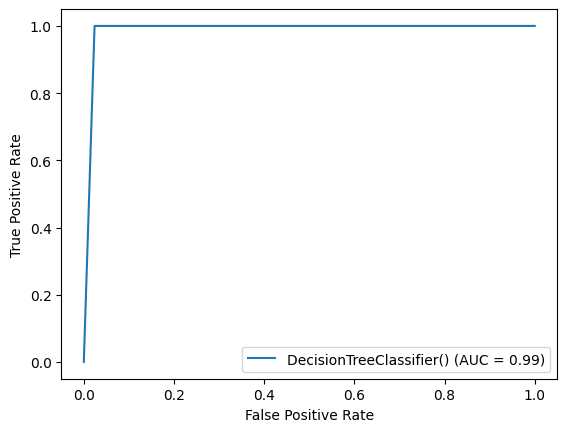

In [40]:
fpr,tpr,thresolds=metrics.roc_curve(y_test,pred,pos_label=1)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(tpr=tpr,fpr=fpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [41]:
file_name='GLASS_DATA.pkl'
pickle.dump(final_model,open(file_name,'wb'))